### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [5]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [6]:
import matplotlib.pyplot as plt

#1. Análisis de facturación
En este primer análisis, vamos a calcular el ingreso total de cada tienda. Para ello, sumaremos los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
Con esto, podremos reconocer la tienda con menor ingreso.




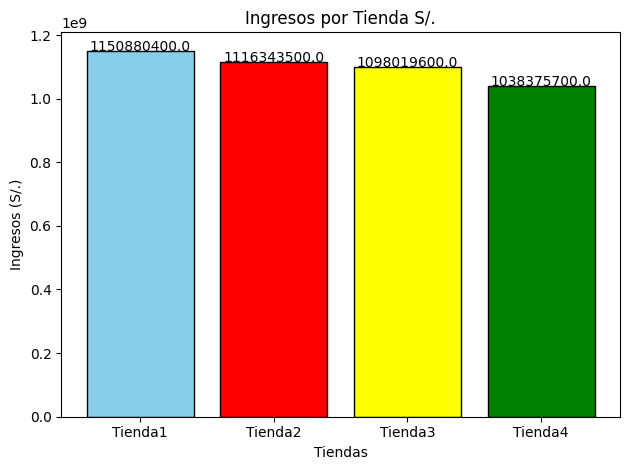

Ingresos totales por cada tienda: 
[('Tienda1', 1150880400.0), ('Tienda2', 1116343500.0), ('Tienda3', 1098019600.0), ('Tienda4', 1038375700.0)]

La tienda con menos ingresos es la ('Tienda4', 1038375700.0)


In [10]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
#Calculamos el total de ingreso de cada tienda según la suma de la columna precio:
ingresototal_x_tienda = lambda tienda: sum(tienda['Precio'])
ingresost_tiendas = [('Tienda1', ingresototal_x_tienda(tienda)),('Tienda2', ingresototal_x_tienda(tienda2)),('Tienda3', ingresototal_x_tienda(tienda3)),('Tienda4', ingresototal_x_tienda(tienda4))]
#Calculamos la tienda que menos ventas tiene comparando los precios:
tienda_menos_ingresos = min(ingresost_tiendas, key=lambda x: x[1])


#Ahora realizaremos su gráfico de barras para que sea mejor comprendido el resultado:
# Extraemos los nombres y los ingresos por separado:
nombres = [tienda[0] for tienda in ingresost_tiendas]
ingresos = [tienda[1] for tienda in ingresost_tiendas]

# Colores personalizados para cada barra:
colores = ['skyblue', 'red', 'yellow', 'green']

# Crear gráfico de barras con borde negro:
plt.bar(nombres, ingresos, color=colores, edgecolor='black')

# Agregar título y etiquetas:
plt.title('Ingresos por Tienda S/.')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos (S/.)')

# Mostrar los valores encima de cada barra:
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso + 5, str(ingreso), ha='center')

# Mostrar el gráfico:
plt.tight_layout()
plt.show()

#Resultado:
print(f'Ingresos totales por cada tienda: \n{ingresost_tiendas}\n')
print(f'La tienda con menos ingresos es la {tienda_menos_ingresos}')

# 2. Ventas por categoría
En este segundo análisis, vamos a calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las 3 categorías más populares de cada tienda.

In [ ]:
# Definimos una función llamada 'ventas_categorias' que recibe como parámetro el DataFrame 'tienda':
def ventas_categorias(tienda):
    # Obtenemos una lista con las categorías únicas que existen en la columna 'Categoría del Producto':
    categorias = list(set(tienda['Categoría del Producto']))
    # Creamos una lista vacía donde almacenaremos tuplas (categoría, cantidad):
    conteo = []
    # Recorremos cada categoría para contar cuántas veces aparece:
    for categoria in categorias:
        # Contamos cuántos productos pertenecen a esta categoría (usamos == y luego sum() para contar los True):
        # Convertimos el resultado a tipo int normal (por defecto es np.int64):
        cantidad = int((tienda['Categoría del Producto'] == categoria).sum())
        # Agregamos una tupla con el nombre de la categoría y la cantidad contada a la lista 'conteo':
        conteo.append((categoria, cantidad))

    # Ordenamos la lista de tuplas de mayor a menor según la cantidad (el segundo elemento de cada tupla):
    return sorted(conteo, key=lambda tupla: tupla[1], reverse=True)

# Imprimimos el resultado al ejecutar la función con el DataFrame 'tienda':
print(ventas_categorias(tienda))

[('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)]


In [ ]:
# Ahora, creamos un diccionario con las categorías más vendidas a las menos vendidas por cada tienda:
dicc_ventas_total_x_categoria_x_tienda = {
    'Tienda1': ventas_categorias(tienda),
    'Tienda2': ventas_categorias(tienda2),
    'Tienda3': ventas_categorias(tienda3),
    'Tienda4': ventas_categorias(tienda4)
    }
dicc_ventas_total_x_categoria_x_tienda
# Obteniendo una mejor vista de los datos de cada tienda con sus respectivas categorías y la cantidad de productos de esta:

{'Tienda1': [('Muebles', 465),
  ('Electrónicos', 448),
  ('Juguetes', 324),
  ('Electrodomésticos', 312),
  ('Deportes y diversión', 284),
  ('Instrumentos musicales', 182),
  ('Libros', 173),
  ('Artículos para el hogar', 171)],
 'Tienda2': [('Muebles', 442),
  ('Electrónicos', 422),
  ('Juguetes', 313),
  ('Electrodomésticos', 305),
  ('Deportes y diversión', 275),
  ('Instrumentos musicales', 224),
  ('Libros', 197),
  ('Artículos para el hogar', 181)],
 'Tienda3': [('Muebles', 499),
  ('Electrónicos', 451),
  ('Juguetes', 315),
  ('Electrodomésticos', 278),
  ('Deportes y diversión', 277),
  ('Libros', 185),
  ('Artículos para el hogar', 177),
  ('Instrumentos musicales', 177)],
 'Tienda4': [('Muebles', 480),
  ('Electrónicos', 451),
  ('Juguetes', 338),
  ('Deportes y diversión', 277),
  ('Electrodomésticos', 254),
  ('Artículos para el hogar', 201),
  ('Libros', 187),
  ('Instrumentos musicales', 170)]}

In [ ]:
# Ahora, vamos a calcular las 3 categorías más vendidas por cada tienda:
categorias_mas_vendidas = [ventas_categorias(t)[:3] for t in [tienda, tienda2, tienda3, tienda4]]
# Usando otro diccionario, vamos a visualizar los datos obtenidos con su respectiva tienda:
dicc_categorias_mas_vendidas = {tienda:categorias for tienda, categorias in zip(tiendas,categorias_mas_vendidas)}
dicc_categorias_mas_vendidas

{'Tienda 1': [('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324)],
 'Tienda 2': [('Muebles', 442), ('Electrónicos', 422), ('Juguetes', 313)],
 'Tienda 3': [('Muebles', 499), ('Electrónicos', 451), ('Juguetes', 315)],
 'Tienda 4': [('Muebles', 480), ('Electrónicos', 451), ('Juguetes', 338)]}

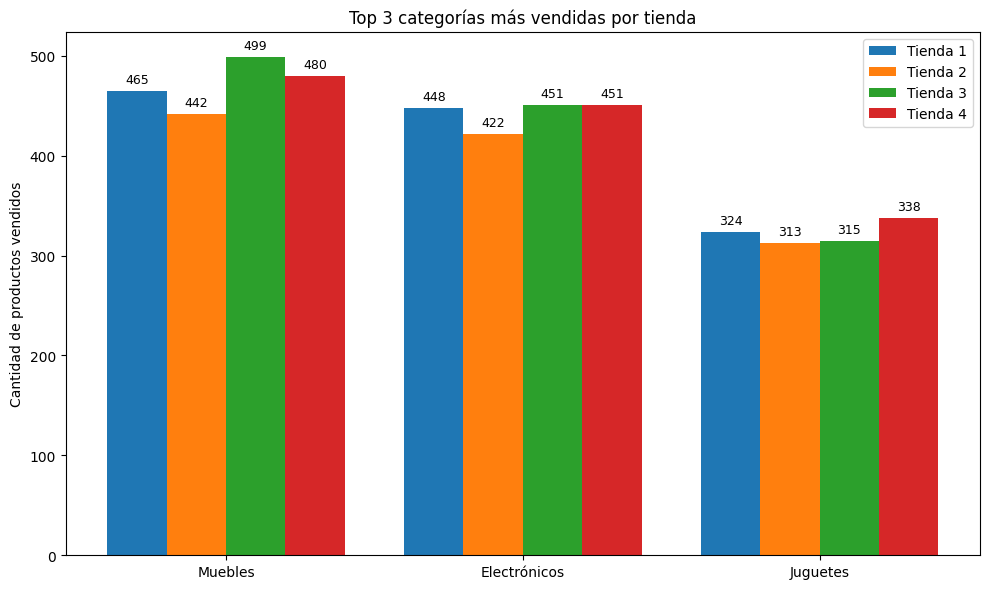

In [ ]:
# Extraemos solo los nombres de las categorías desde la tienda 1 para usar como etiquetas del eje X:
categorias = [cat for cat, _ in dicc_categorias_mas_vendidas['Tienda 1']]
# Obtenemos la lista de nombres de todas las tiendas (las claves del diccionario):
tiendas = list(dicc_categorias_mas_vendidas.keys())
# Creamos una lista para almacenar los valores (cantidades de productos) por cada tienda:
valores_por_tienda = []
# Recorremos cada tienda para extraer los valores (cantidad vendida) de sus categorías más vendidas:
for tienda in tiendas:
    valores = [valor for _, valor in dicc_categorias_mas_vendidas[tienda]]
    valores_por_tienda.append(valores)

# Creamos un arreglo de posiciones para ubicar las barras de las categorías en el eje X:
import numpy as np
x = np.arange(len(categorias))  # Ej: [0, 1, 2] si hay 3 categorías
# Establecemos el ancho de cada barra:
width = 0.2
# Creamos la figura y los ejes del gráfico:
fig, ax = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico
# Recorremos los valores de cada tienda para graficar sus barras:
for i, valores in enumerate(valores_por_tienda):
    # Calculamos la posición horizontal para las barras de esta tienda:
    posiciones_barra = x + i * width

    # Dibujamos las barras en el gráfico:
    barras = ax.bar(posiciones_barra, valores, width, label=tiendas[i])

    # Mostramos los valores (cantidades) encima de cada barra:
    for x_pos, y_val in zip(posiciones_barra, valores):
        ax.text(x_pos, y_val + 5, str(y_val), ha='center', va='bottom', fontsize=9)

# Etiqueta del eje Y:
ax.set_ylabel('Cantidad de productos vendidos')
# Título del gráfico:
ax.set_title('Top 3 categorías más vendidas por tienda')
# Colocamos las etiquetas en el eje X centradas entre las agrupaciones de barras:
ax.set_xticks(x + width * 1.5)  # 1.5 es la mitad de 3 barras (ajuste visual)
# Mostramos los nombres de las categorías como etiquetas del eje X:
ax.set_xticklabels(categorias)
# Mostramos la leyenda (con los nombres de las tiendas):
ax.legend()
# Ajustamos el diseño para que no se superpongan los elementos:
plt.tight_layout()
# Mostramos el gráfico en pantalla:
plt.show()

# 3. Calificación promedio de la tienda
En este tercer análisis, vamos a calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos y representarlo gráficamente, determinando la tienda con peor calificación.

In [32]:
# Primero debemos reconocer la escala de la calificacion (sin duplicados):
calificacion = list(set(tienda['Calificación']))
calificacion

[1, 2, 3, 4, 5]

In [33]:
# Creamos una funcion para determinar el promedio de calificación de cada tienda y luego lo guardamos en una lista:
calificacion_promedio = lambda tienda: round(sum(tienda['Calificación']) / len(tienda), 2)
calificacion_x_tienda = [calificacion_promedio(tienda),calificacion_promedio(tienda2),calificacion_promedio(tienda3),calificacion_promedio(tienda4)]

# Ahora mostramos el nombre de tienda + la calificación promedio de esta:
print("Calificación promedio por cada tienda:")
for nombre, calificacion in zip(tiendas, calificacion_x_tienda):
    print(f"{nombre}: {calificacion}")

# Luego, buscamos la tienda con la peor calificación:
tienda_peor_calificacion = min(calificacion_x_tienda)
peor_tienda = tiendas[calificacion_x_tienda.index(tienda_peor_calificacion)]
print(f"\nLa tienda con la peor calificación es la {peor_tienda} con una calificación de: {tienda_peor_calificacion}")

Calificación promedio por cada tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0

La tienda con la peor calificación es la Tienda 1 con una calificación de: 3.98


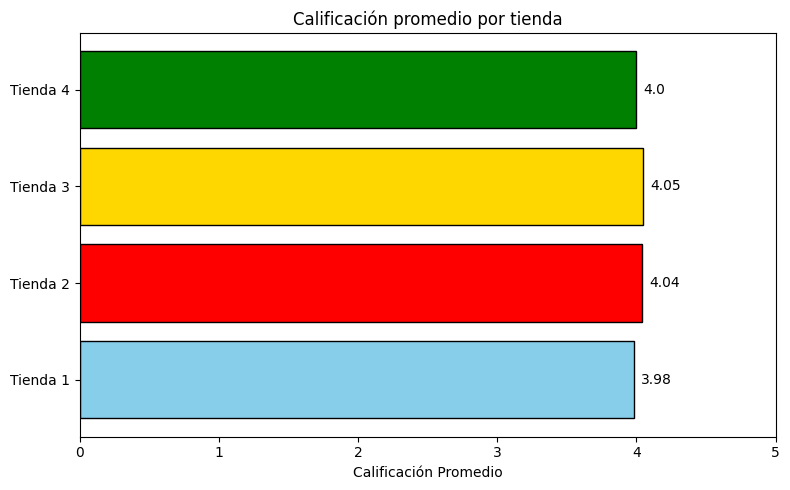


La tienda con la peor calificación es la Tienda 1 con una calificación de: 3.98


In [34]:
# Datos
nombres_tiendas = tiendas  # ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = calificacion_x_tienda  # [4.1, 3.8, 4.5, 4.0]

# Lista de colores: celeste, rojo, amarillo, verde
colores = ['skyblue', 'red', 'gold', 'green']

# Crear gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(nombres_tiendas, calificaciones, color=colores, edgecolor='black')

# Títulos y etiquetas
plt.xlabel('Calificación Promedio')
plt.title('Calificación promedio por tienda')
plt.xlim(0, 5)  # Si las calificaciones van de 0 a 5

# Mostrar calificación a la derecha de cada barra
for i, valor in enumerate(calificaciones):
    plt.text(valor + 0.05, i, str(valor), va='center')

plt.tight_layout()
plt.show()
print(f"\nLa tienda con la peor calificación es la {peor_tienda} con una calificación de: {tienda_peor_calificacion}")

# 4. Productos más y menos vendidos
En este cuarto análisis, vamos a identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Luego de esto, visualizaremos los resultados con una gráfica para que quede claro qué productos destacaron en ventas en cada tienda y cuales no.

In [ ]:
#Primero vamos a reconocer los productos que se venden en todas las tienda:
productos = list(set(tienda['Producto']))
print(f'Total de productos: {len(productos)}')
productos

Total de productos: 51


['Smartwatch',
 'Cuerda para saltar',
 'Mesa de comedor',
 'Lavavajillas',
 'Modelado predictivo',
 'Vaso térmico',
 'Kit de bancas',
 'Set de ollas',
 'Cubo mágico 8x8',
 'Iniciando en programación',
 'Dashboards con Power BI',
 'Bloques de construcción',
 'Ajedrez de madera',
 'Smart TV',
 'Juego de mesa',
 'Batería',
 'Guitarra eléctrica',
 'Pandereta',
 'Armario',
 'Carrito de control remoto',
 'Tablet ABXY',
 'Balón de voleibol',
 'Dinosaurio Rex',
 'Cama box',
 'Cama king',
 'Estufa',
 'Olla de presión',
 'Cubertería',
 'Ciencia de datos con Python',
 'TV LED UHD 4K',
 'Refrigerador',
 'Mochila',
 'Set de vasos',
 'Impresora',
 'Celular ABXY',
 'Auriculares',
 'Muñeca bebé',
 'Lavadora de ropa',
 'Mesa de noche',
 'Iphone 15',
 'Guitarra acústica',
 'Secadora de ropa',
 'Mesa de centro',
 'Sofá reclinable',
 'Silla de oficina',
 'Asistente virtual',
 'Microondas',
 'Bicicleta',
 'Balón de baloncesto',
 'Auriculares con micrófono',
 'Sillón']

In [ ]:
# Ahora definimos una funcion para que nos ayude a ver los productos de cada tienda con su monto:
def ventas_productos(tienda):
    lista_productos = []
    total_productos = []
    for i in range(len(productos)):
        lista_productos = [j for j in tienda['Producto'] if j == productos[i]]
        total_productos.append(len(lista_productos))
    tuplas_ventas_x_producto = list(zip(productos, total_productos))
    return sorted(tuplas_ventas_x_producto, key=lambda a: a[1], reverse=True)
# Ahora creamos un diccionario para organizar los productos obtenidos con su monto agrupado con su respectiva tienda:
dicc_productos_vendidos_x_tienda = {
    'Tienda1': ventas_productos(tienda),
    'Tienda2': ventas_productos(tienda2),
    'Tienda3': ventas_productos(tienda3),
    'Tienda4': ventas_productos(tienda4),}
dicc_productos_vendidos_x_tienda

{'Tienda1': [('Armario', 60),
  ('TV LED UHD 4K', 60),
  ('Microondas', 60),
  ('Secadora de ropa', 58),
  ('Bloques de construcción', 56),
  ('Mesa de noche', 56),
  ('Balón de baloncesto', 55),
  ('Vaso térmico', 54),
  ('Refrigerador', 54),
  ('Impresora', 54),
  ('Bicicleta', 54),
  ('Batería', 53),
  ('Carrito de control remoto', 52),
  ('Cubertería', 52),
  ('Modelado predictivo', 51),
  ('Auriculares', 50),
  ('Ajedrez de madera', 49),
  ('Iphone 15', 49),
  ('Lavavajillas', 48),
  ('Guitarra eléctrica', 47),
  ('Lavadora de ropa', 47),
  ('Guitarra acústica', 46),
  ('Sofá reclinable', 46),
  ('Silla de oficina', 46),
  ('Estufa', 45),
  ('Kit de bancas', 44),
  ('Cubo mágico 8x8', 44),
  ('Smart TV', 44),
  ('Cama box', 44),
  ('Cama king', 44),
  ('Mesa de centro', 44),
  ('Smartwatch', 43),
  ('Set de ollas', 43),
  ('Juego de mesa', 43),
  ('Dashboards con Power BI', 42),
  ('Tablet ABXY', 42),
  ('Balón de voleibol', 42),
  ('Iniciando en programación', 41),
  ('Set de vas

# **AHORA CALCULAMOS LOS 3 PRODUCTOS MÁS VENDIDOS POR CADA TIENDA!**

In [ ]:
# Creamos la lista de los 3 productos más vendidos por cada tienda:
productos_mas_vendidos = [ventas_productos(tienda), ventas_productos(tienda2), ventas_productos(tienda3), ventas_productos(tienda4)]
productos_mas_vendidos = [productos_mas_vendidos[i][:3] for i in range(len(productos_mas_vendidos))]
# Ahora usamos un diccionario para visualizar mejor los datos obtenidos con su respectiva tienda:
dicc_productos_mas_vendidos = {tiendas:productos for tiendas,productos in zip(tiendas,productos_mas_vendidos)}
dicc_productos_mas_vendidos

{'Tienda 1': [('Armario', 60), ('TV LED UHD 4K', 60), ('Microondas', 60)],
 'Tienda 2': [('Iniciando en programación', 65),
  ('Microondas', 62),
  ('Batería', 61)],
 'Tienda 3': [('Kit de bancas', 57),
  ('Mesa de comedor', 56),
  ('Cama king', 56)],
 'Tienda 4': [('Cama box', 62),
  ('Cubertería', 59),
  ('Dashboards con Power BI', 56)]}

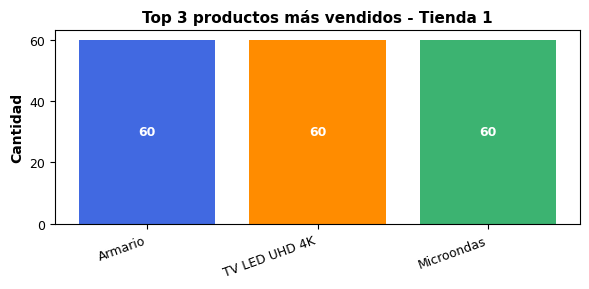

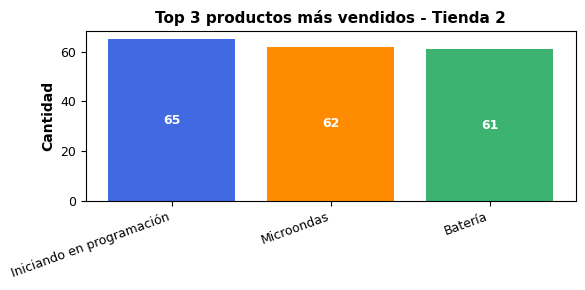

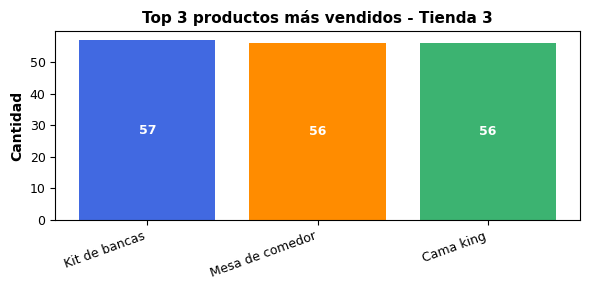

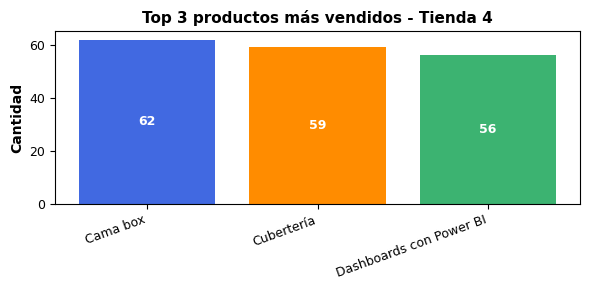

In [ ]:
# Aquí viene el código para realizar la gráfica de barras de los 3 productos más vendidos por cada tienda:
colores = ['royalblue', 'darkorange', 'mediumseagreen']

for tienda, productos in dicc_productos_mas_vendidos.items():
    nombres = [p[0] for p in productos]
    cantidades = [p[1] for p in productos]

    plt.figure(figsize=(6, 3))
    barras = plt.bar(nombres, cantidades, color=colores)

    plt.title(f"Top 3 productos más vendidos - {tienda}", fontsize=11, fontweight='bold')
    plt.ylabel("Cantidad", fontsize=10, fontweight='bold')
    plt.xticks(rotation=20, ha='right', fontsize=9)
    plt.yticks(fontsize=9)

    # Mostrar valores *dentro* de las barras
    for barra in barras:
        y = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width()/2,
            y * 0.5,  # Mitad de la barra
            str(int(y)),
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )

    plt.tight_layout()
    plt.show()

# **AHORA CALCULAMOS LOS 3 PRODUCTOS MENOS VENDIDOS POR CADA TIENDA!**

In [ ]:
# Volvemos a usar esta lista pero ahora cambiando algunas cosas, especialmente el [3:] por el [-3:] para que nos la lista desde el final, obteniendo así los 3 productos menos vendidos:
productos_menos_vendidos = [ventas_productos(tienda), ventas_productos(tienda2), ventas_productos(tienda3), ventas_productos(tienda4)]
productos_menos_vendidos = [productos_menos_vendidos[i][-3:] for i in range(len(productos_menos_vendidos))]
# Volvemos a usar un diccionario para visualizar mejor:
dicc_productos_menos_vendidos = {tiendas:productos for tiendas,productos in zip(tiendas,productos_menos_vendidos)}
dicc_productos_menos_vendidos

{'Tienda 1': [('Olla de presión', 35),
  ('Celular ABXY', 33),
  ('Auriculares con micrófono', 33)],
 'Tienda 2': [('Mesa de comedor', 34),
  ('Impresora', 34),
  ('Juego de mesa', 32)],
 'Tienda 3': [('Set de vasos', 36),
  ('Microondas', 36),
  ('Bloques de construcción', 35)],
 'Tienda 4': [('Guitarra acústica', 37),
  ('Armario', 34),
  ('Guitarra eléctrica', 33)]}

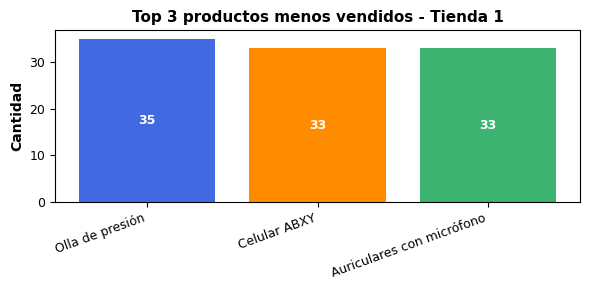

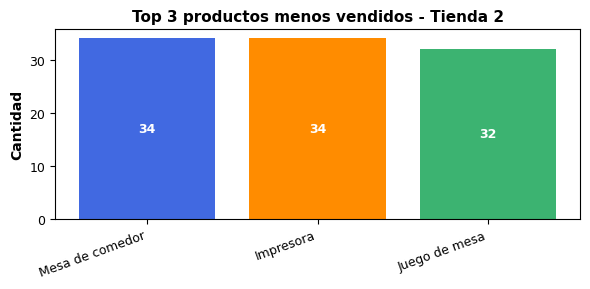

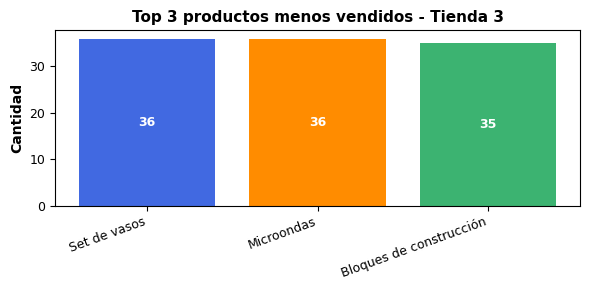

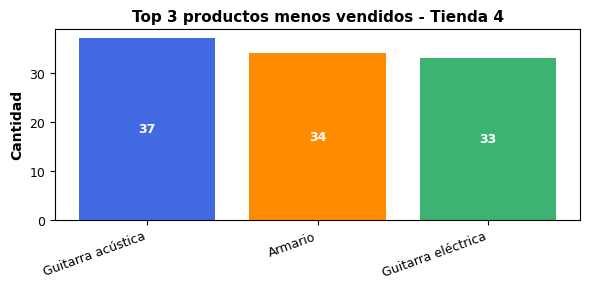

In [ ]:
# Volvemos a usar el mismo codigo del gráfico anterior, ahora cambiando las variables con los menos vendidos:
colores = ['royalblue', 'darkorange', 'mediumseagreen']

for tienda, productos in dicc_productos_menos_vendidos.items():
    nombres = [p[0] for p in productos]
    cantidades = [p[1] for p in productos]

    plt.figure(figsize=(6, 3))
    barras = plt.bar(nombres, cantidades, color=colores)

    plt.title(f"Top 3 productos menos vendidos - {tienda}", fontsize=11, fontweight='bold')
    plt.ylabel("Cantidad", fontsize=10, fontweight='bold')
    plt.xticks(rotation=20, ha='right', fontsize=9)
    plt.yticks(fontsize=9)

    # Mostrar valores *dentro* de las barras
    for barra in barras:
        y = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width()/2,
            y * 0.5,  # Mitad de la barra
            str(int(y)),
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )

    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

En este quinto y último paso, vamos a calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda y determinar la tienda con el gasto mayor.

In [24]:
# Función para calcular el promedio de costo de envío de una tienda:
def promedio_costo_envio(tienda):
    return round(sum(tienda['Costo de envío']) / len(tienda), 2)

# Creamos el diccionario asociando nombre de tienda con su promedio de costo de envío:
promedio_envio_por_tienda = {
    "Tienda 1": promedio_costo_envio(tienda),
    "Tienda 2": promedio_costo_envio(tienda2),
    "Tienda 3": promedio_costo_envio(tienda3),
    "Tienda 4": promedio_costo_envio(tienda4)}
print("Lista de los envíos promedios de cada tienda:")
print(promedio_envio_por_tienda)

# Encontramos la tienda con menor promedio de envío:
tienda_menor_costo = min(promedio_envio_por_tienda, key=promedio_envio_por_tienda.get)
costo_menor = promedio_envio_por_tienda[tienda_menor_costo]

# Encontramos la tienda con mayor promedio de envío:
tienda_mayor_costo = max(promedio_envio_por_tienda, key=promedio_envio_por_tienda.get)
costo_mayor = promedio_envio_por_tienda[tienda_mayor_costo]

print(f"\nLa tienda con el costo promedio menor de envío es {tienda_menor_costo} con un monto de: ${costo_menor:,}")
print(f"\nLa tienda con el costo promedio mayor de envío es {tienda_mayor_costo} con un monto de: ${costo_mayor:,}")

Lista de los envíos promedios de cada tienda:
{'Tienda 1': 26018.61, 'Tienda 2': 25216.24, 'Tienda 3': 24805.68, 'Tienda 4': 23459.46}

La tienda con el costo promedio menor de envío es Tienda 4 con un monto de: $23,459.46

La tienda con el costo promedio mayor de envío es Tienda 1 con un monto de: $26,018.61


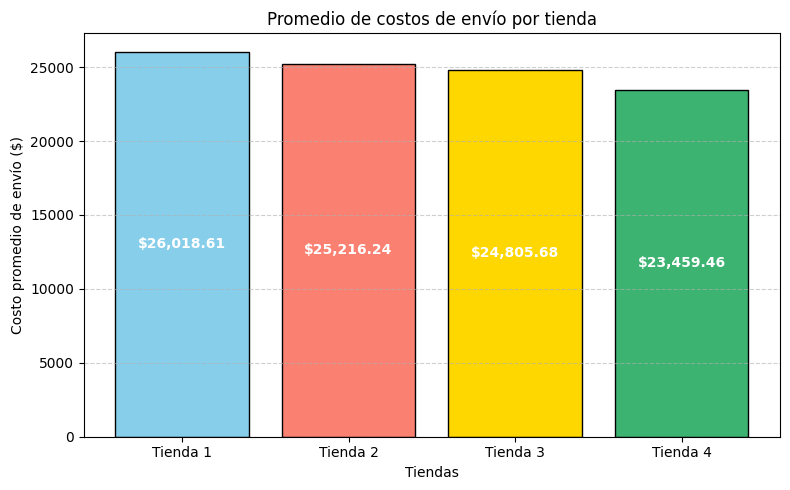


La tienda con el costo promedio menor de envío es Tienda 4 con un monto de: $23,459.46
La tienda con el costo promedio mayor de envío es Tienda 1 con un monto de: $26,018.61

Por lo tanto, la tienda que desfavorece al señor Juan en el costo promedio de envío es la Tienda 1 por gastar demasiado.


In [30]:
# Datos del diccionario
nombres_tiendas = list(promedio_envio_por_tienda.keys())
promedios_envio = list(promedio_envio_por_tienda.values())

# Colores para cada barra
colores = ['skyblue', 'salmon', 'gold', 'mediumseagreen']

# Crear el gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, promedios_envio, color=colores, edgecolor='black')

# Títulos y etiquetas
plt.title('Promedio de costos de envío por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo promedio de envío ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores dentro de las barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura * 0.5,  # Posición vertical dentro de la barra
             f"${promedios_envio[i]:,.2f}",
             ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(f"\nLa tienda con el costo promedio menor de envío es {tienda_menor_costo} con un monto de: ${costo_menor:,}")
print(f"La tienda con el costo promedio mayor de envío es {tienda_mayor_costo} con un monto de: ${costo_mayor:,}")
print(f"\nPor lo tanto, la tienda que desfavorece al señor Juan en el costo promedio de envío es la {tienda_mayor_costo} por gastar demasiado.")

# **INFORME**
Después de haber realizado estos 5 análisis sobre las tiendas, reconociendo sus ingresos totales, las categorías de productos más vendidas, las calificaciones promedio, los productos más y menos vendidos y, por último, el coste de envío promedio de cada tienda, llegó el momento de realizar un **informe** con los datos adquiridos para **determinar** cuál de las **4 tiendas** el señor Juan debe **vender** para poder usarlo en un **nuevo emprendimiento**. Los datos obtenidos serán mostrados a continuacion:

**1. INGRESO TOTAL POR TIENDA**

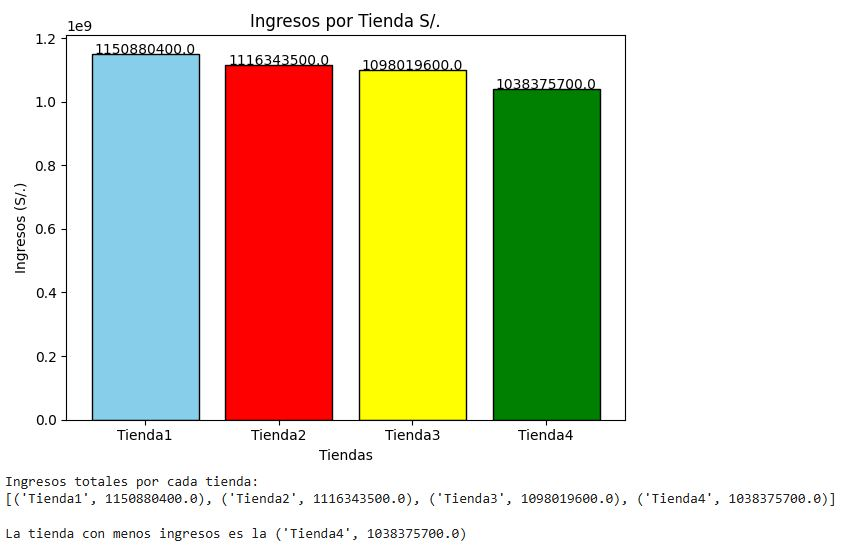

**2. VENTAS POR CATEGORÍA**

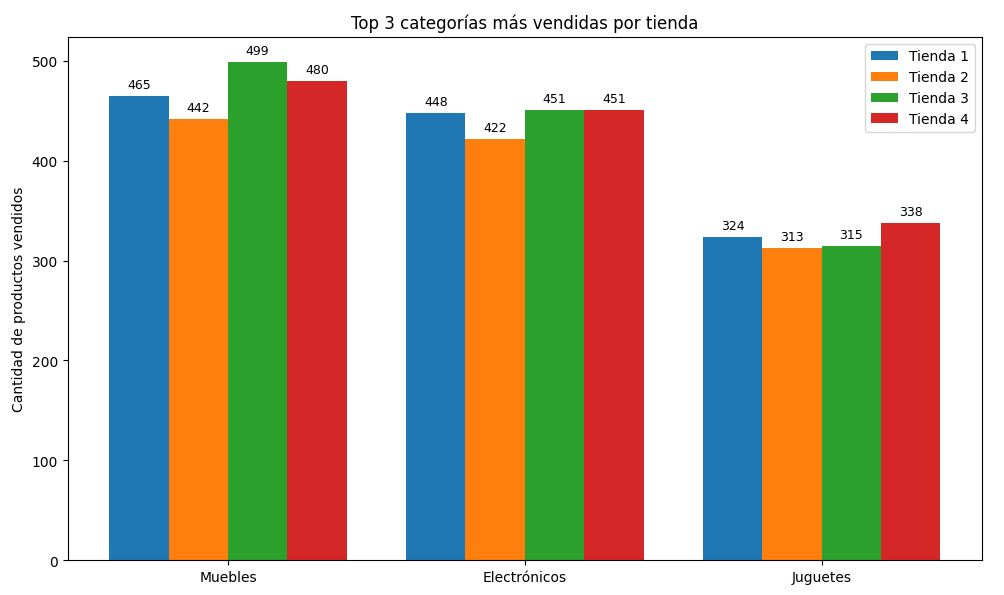

**3. CALIFICACIÓN PROMEDIO POR TIENDA**

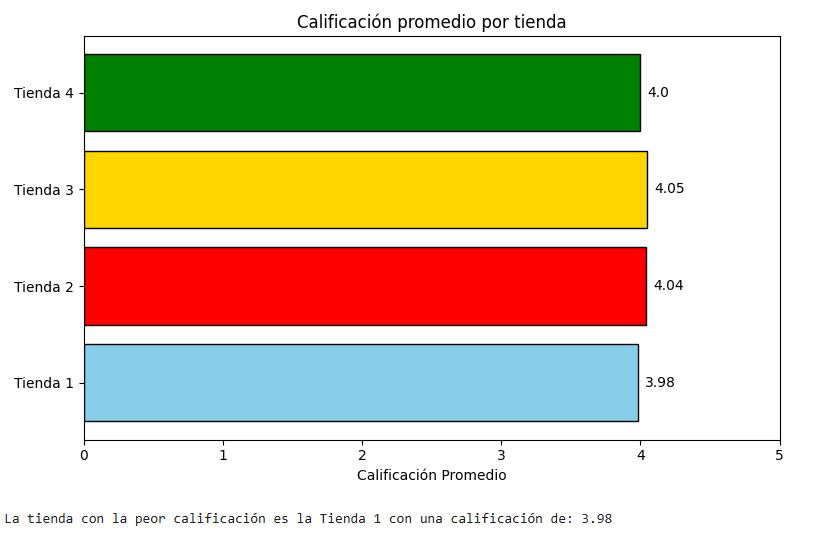

**4.1 PRODUCTOS MÁS VENDIDOS**

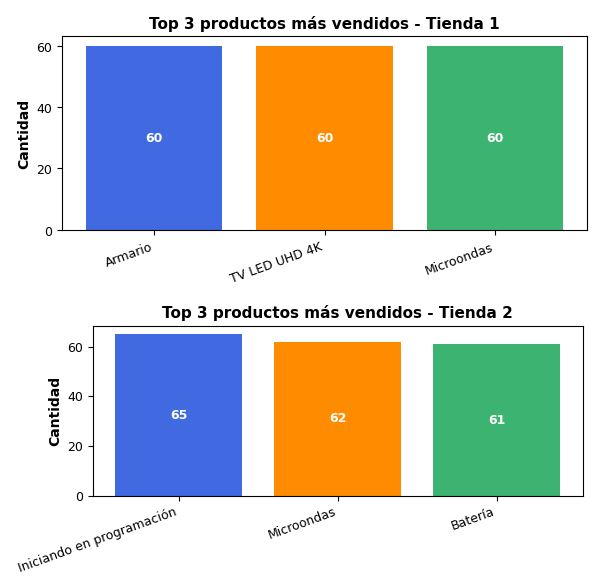

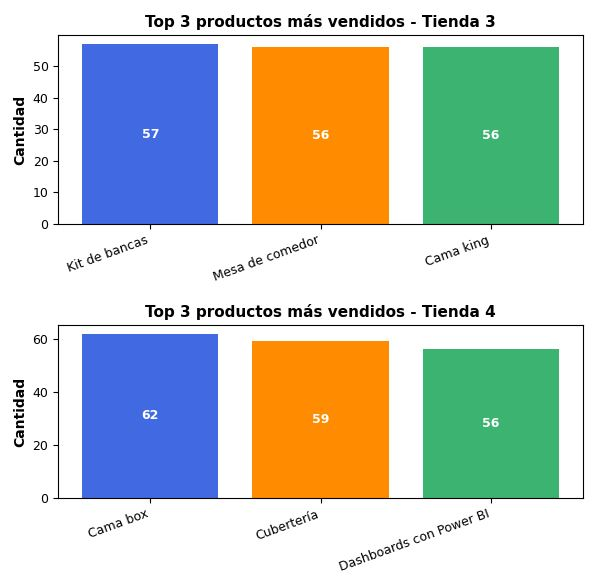

**4.2 PRODUCTOS MENOS VENDIDOS**

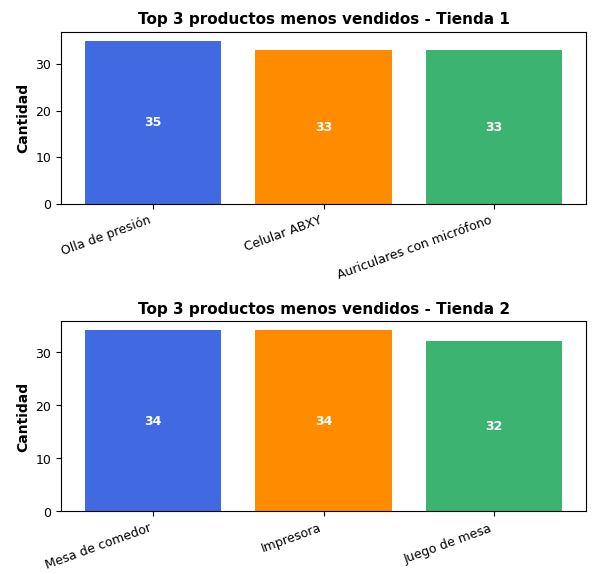

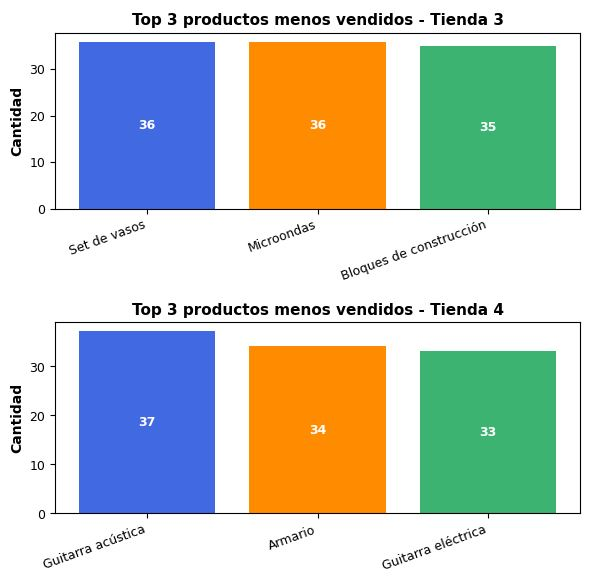

**5. COSTO DE ENVÍO PROMEDIO POR TIENDA**

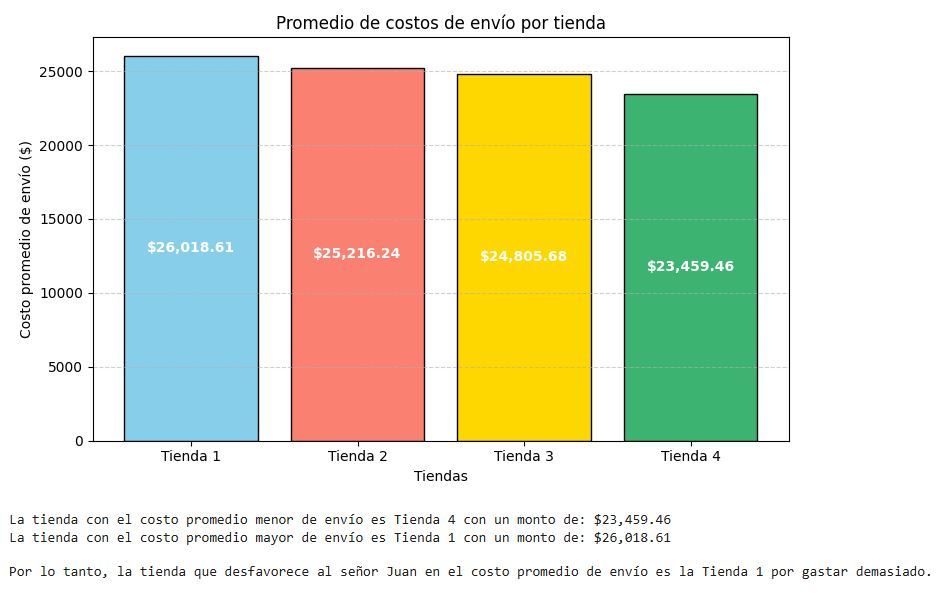

---
Como se puede apreciar en los gráficos, tanto la Tienda 1 como la Tienda 4 son posibles candidatos para ser vendidas, pero en estos casos, la decisión es tomada según la cantidad de ingresos que proporcione las tiendas.

---

Como se puede ver en la gráfica, la Tienda 4 es la tienda que menos ingresos genera al señor Juan. Claro que, su bajo costo promedio de envío de productos, le da una leve ventaja a la Tienda 4 en contraste con la Tienda 1. Sin embargo, debo aclarar que, a pesar de que la Tienda 4 posea un bajo costo de envío, esto no es suficiente para nivelar sus bajos ingresos. No sirve de nada tener bajos costos por envío de productos si sus ingresos no serán suficientes para autocompletar ese desnivel, caso que la Tienda 1 si logra. Es verdad que la Tienda 1 posee el mayor gasto de envío de producto pero, a diferencia de la Tienda 4, la Tienda 1 sí genera una gran cantidad de ingresos, nivelando correctamente entre un alto gasto de envío y en favor, una gran cantidad de ingresos de la misma.

Por lo tanto, como informe final, bajo los datos adquiridos y, la lógica de todo negocio, recomiendo al señor Juan que, la mejor opción es vender la Tienda 4 porque, como mencioné anteriormente, la Tienda 4 genera muy pocos ingresos en comparación con las otras tiendas. De hacer caso a esta recomendación, el señor Juan podrá invertir su ganancia obtenida de la venta de la Tienda 4, en un nuevo emprendimiento, el cuál es posible que genere aún más ingresos que esta tienda.

---

En resumen, la Tienda 4 es la mejor opción para que el señor Juan la venda y así poder invertir en un nuevo emprendimiento, posiblemente más eficiente y beneficiente que la Tienda 4.

---
